In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
df = pd.read_csv("olympic_medals.csv")

In [3]:
df

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE
...,...,...,...,...,...,...,...,...,...,...,...,...
21692,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21693,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,NaN,NaN,Alexandros Nikolopoulos,Greece,GR,GRE
21694,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN
21695,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/launceston-el...,Launceston ELLIOT,Great Britain,GB,GBR


In [4]:
feature = df[['discipline_title', 'event_title', 'event_gender', 'participant_type', 'country_name']]
label = df['medal_type']

In [5]:
feature.select_dtypes(exclude=['int64']).columns

Index(['discipline_title', 'event_title', 'event_gender', 'participant_type',
       'country_name'],
      dtype='object')

In [6]:
feature_onehot = pd.get_dummies(feature, columns=feature.select_dtypes(exclude=['int64']).columns)

In [7]:
feature_onehot

,discipline_title_3x3 Basketball,discipline_title_Alpine Skiing,discipline_title_Archery,discipline_title_Artistic Gymnastics,discipline_title_Artistic Swimming,discipline_title_Athletics,discipline_title_Badminton,discipline_title_Baseball,discipline_title_Baseball/Softball,discipline_title_Basketball,...,country_name_United States of America,country_name_Uruguay,country_name_Uzbekistan,country_name_Venezuela,country_name_Vietnam,"country_name_Virgin Islands, US",country_name_West Indies Federation,country_name_Yugoslavia,country_name_Zambia,country_name_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train,X_test,y_train,y_test = train_test_split(feature_onehot,label,test_size=0.3,random_state=42)

## Decision Tree

In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test,tree_pred)
print("Accuracy:",tree_score)
print("Report:",metrics.classification_report(y_test,tree_pred))

Accuracy: 0.3566820276497696
Report:               precision    recall  f1-score   support

      BRONZE       0.37      0.42      0.39      2348
        GOLD       0.37      0.40      0.39      2073
      SILVER       0.32      0.24      0.27      2089

    accuracy                           0.36      6510
   macro avg       0.35      0.35      0.35      6510
weighted avg       0.35      0.36      0.35      6510



In [11]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique,counts))

{'BRONZE': 2348, 'GOLD': 2073, 'SILVER': 2089}

In [12]:
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

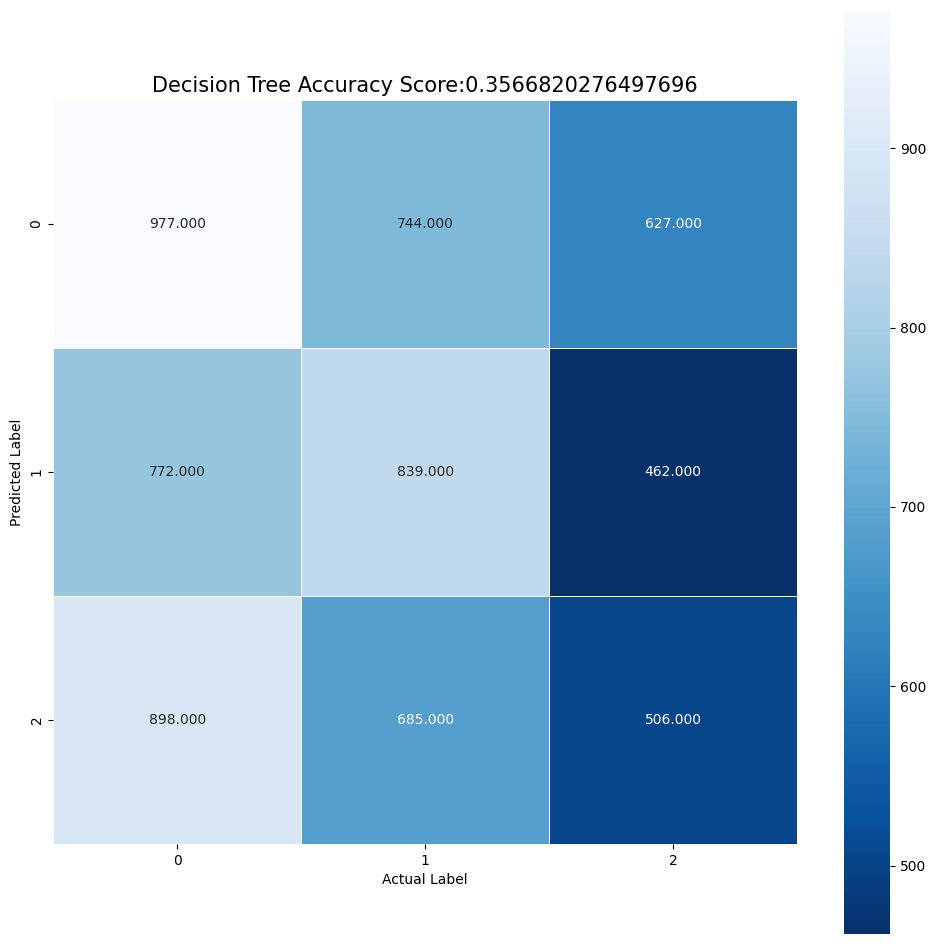

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm,annot=True, fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
title ='Decision Tree Accuracy Score:{0}'.format(tree_score)
plt.title(title,size=15);

In [14]:
from sklearn.tree import plot_tree,DecisionTreeClassifier,export_text

In [15]:
tree_text = export_text(clf, feature_names=list(X_train.columns))
print(tree_text)

|--- country_name_United States of America <= 0.50
|   |--- discipline_title_Boxing <= 0.50
|   |   |--- discipline_title_Judo <= 0.50
|   |   |   |--- country_name_Soviet Union <= 0.50
|   |   |   |   |--- country_name_People's Republic of China <= 0.50
|   |   |   |   |   |--- event_title_4x100m medley relay men <= 0.50
|   |   |   |   |   |   |--- discipline_title_Table Tennis <= 0.50
|   |   |   |   |   |   |   |--- country_name_Ukraine <= 0.50
|   |   |   |   |   |   |   |   |--- discipline_title_Basketball <= 0.50
|   |   |   |   |   |   |   |   |   |--- country_name_Poland <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- country_name_Malaysia <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 350
|   |   |   |   |   |   |   |   |   |   |--- country_name_Malaysia >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- country_name_Poland >  0.50
|   |   |   |   |   |   |   | 

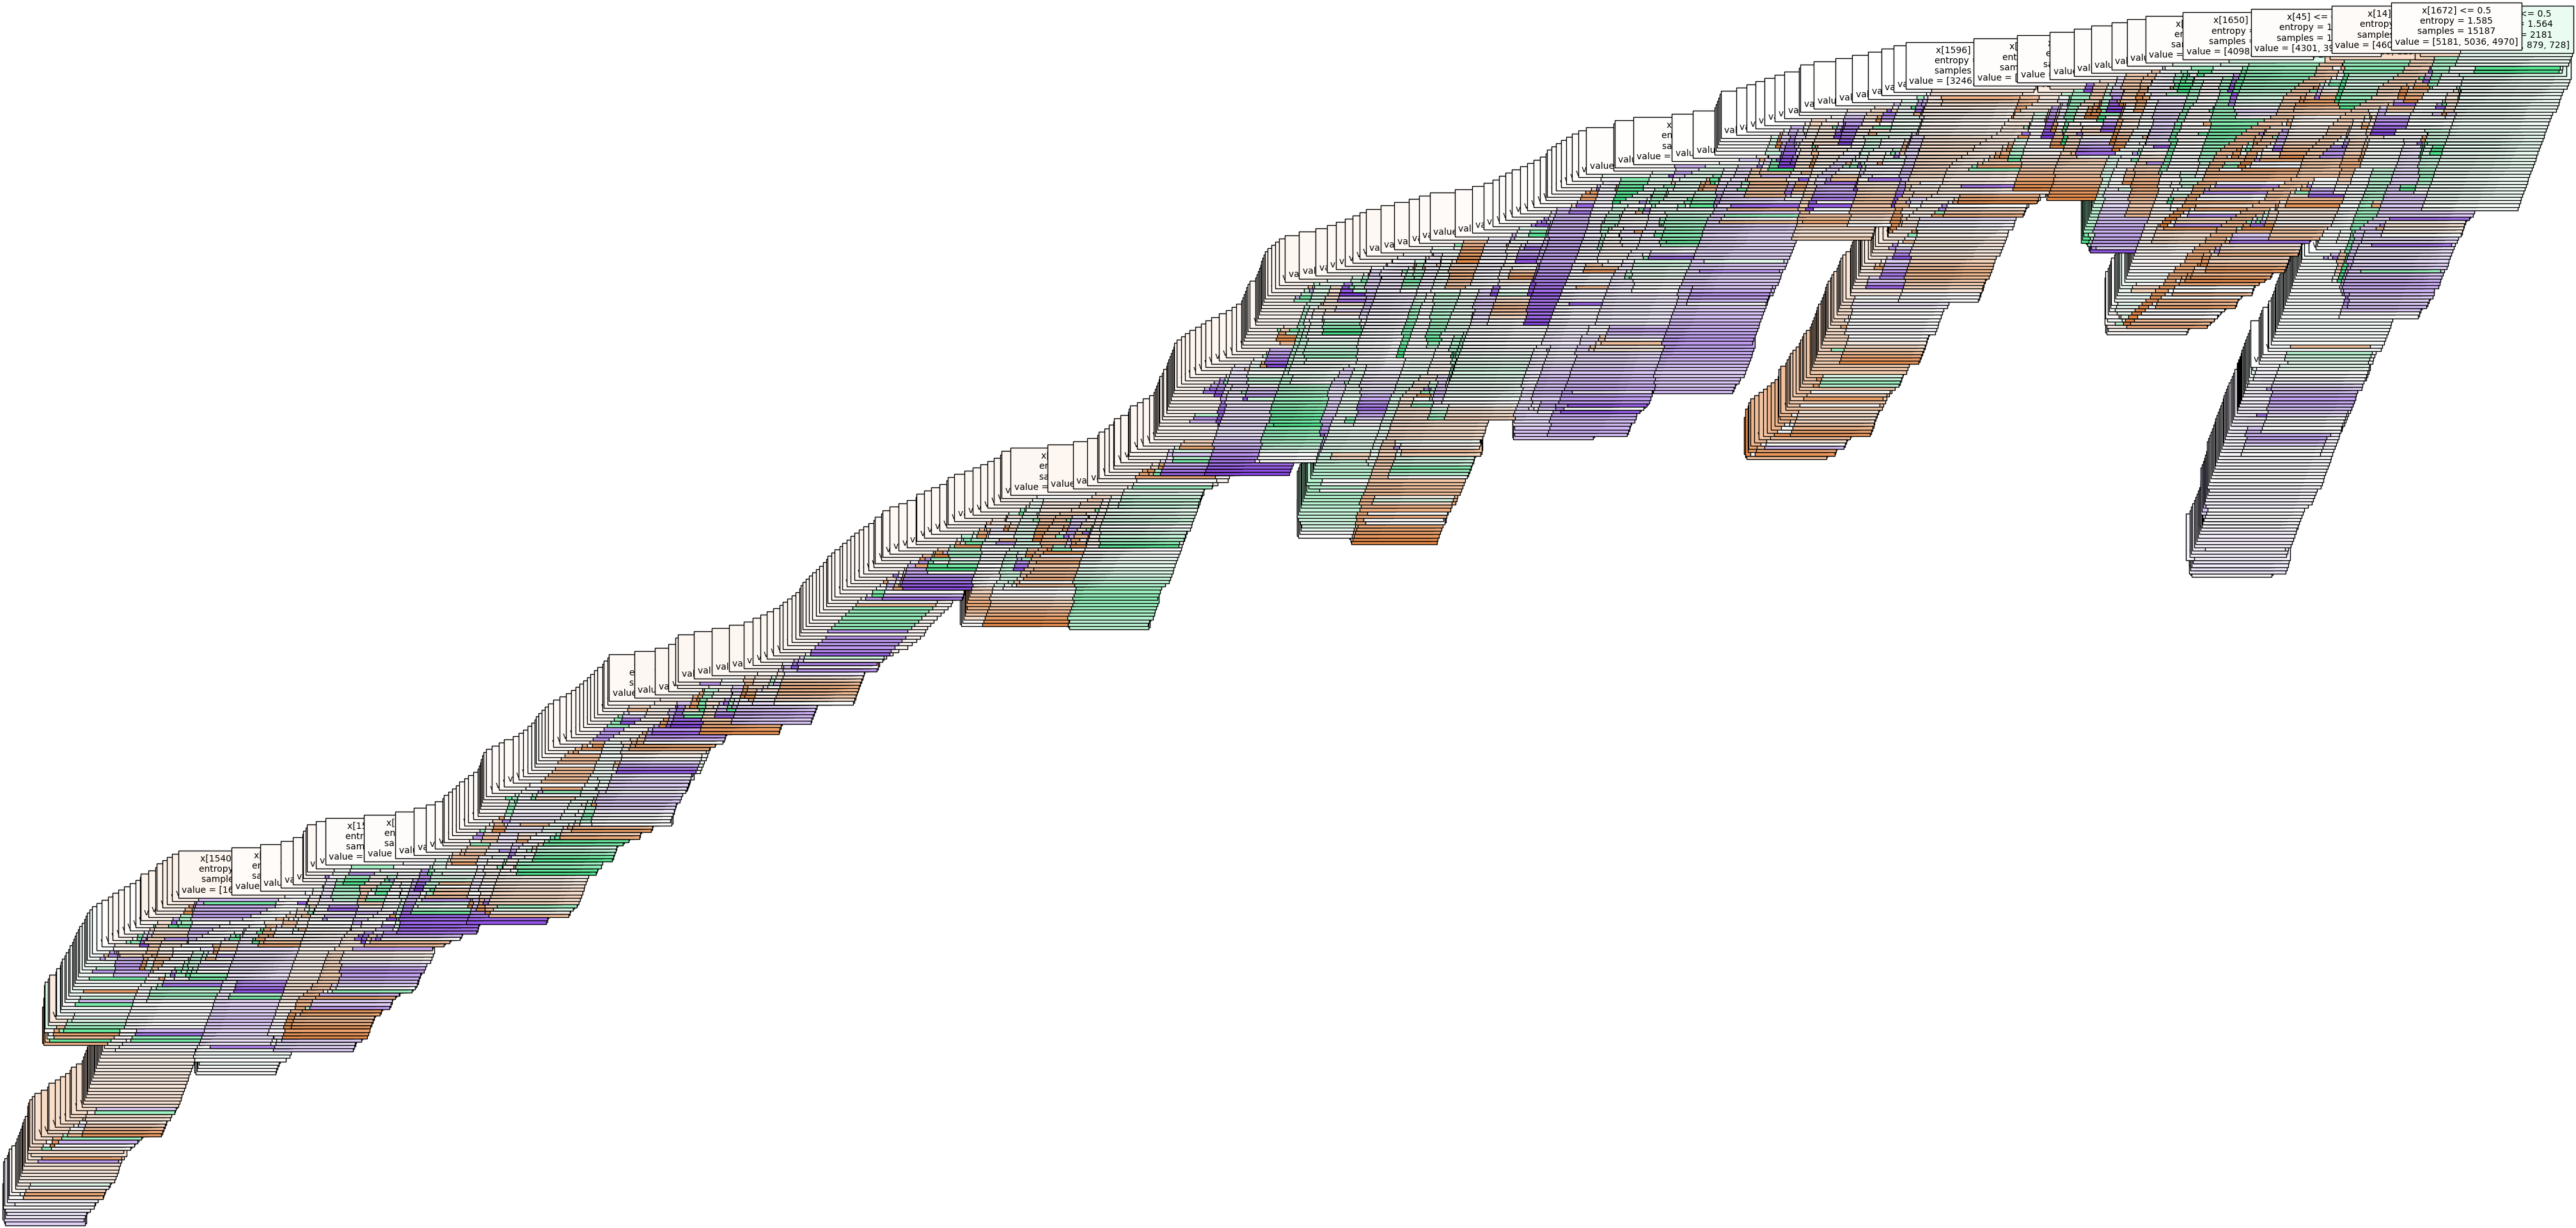

In [16]:
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf,filled=True,fontsize=10)
plt.savefig('decision_tree',dpi=100)
plt.show()

### Naive Bayes

In [28]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train,y_train).predict(X_test)

In [29]:
bayes_score = metrics.accuracy_score(y_test,bayes_pred)
print("Accuracy:",bayes_score)
print("Report:",metrics.classification_report(y_test,bayes_pred))

Accuracy: 0.24500768049155147
Report:               precision    recall  f1-score   support

      BRONZE       0.26      0.09      0.13      2348
        GOLD       0.27      0.56      0.36      2073
      SILVER       0.17      0.11      0.13      2089

    accuracy                           0.25      6510
   macro avg       0.23      0.25      0.21      6510
weighted avg       0.23      0.25      0.20      6510



In [33]:
new_data = pd.DataFrame([['Figure skating','Team Event', 'Mixed', 'GameTeam', 'ROC']], columns=['discipline_title', 'event_title', 'event_gender', 'participant_type', 'country_name'])
new_data_onehot = pd.get_dummies(new_data, columns=new_data.select_dtypes(exclude=['int64']).columns)
new_data_encoded = new_data_onehot.reindex(columns=X_train.columns, fill_value=0)  



In [30]:
new_data = pd.DataFrame([['Ski Jumping', 'Mixed Team','Mixed', 'GameTeam', 'Slovenia']], columns=['discipline_title', 'event_title', 'event_gender', 'participant_type', 'country_name'])
new_data_onehot = pd.get_dummies(new_data, columns=new_data.select_dtypes(exclude=['int64']).columns)
new_data_encoded = new_data_onehot.reindex(columns=X_train.columns, fill_value=0)  

In [31]:
bayes_pred = gnb.predict(new_data_encoded)
print("Predicted Medal Type:", bayes_pred)

Predicted Medal Type: ['BRONZE']
